In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

In [2]:
def log_return(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    return df[ticker]

In [3]:
def portfolio_logr(tickers,start,end):
    portfolio = pd.concat([log_return(ticker,start,end)for ticker in tickers],axis=1)
    return portfolio

In [12]:
tickers = ['NVDA','AMZN','GOOGL','GILD','CSCO','BIDU','ADSK','BIIB','INTC']

In [13]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2019,11,16)

In [14]:
returns = portfolio_logr(tickers,start,end)

In [15]:
returns.head()

,NVDA,AMZN,GOOGL,GILD,CSCO,BIDU,ADSK,BIIB,INTC
Date,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.011332,-0.008526,0.004304,0.003815,0.019140,-0.018678,-0.019666,0.001936,0.022962
2012-01-05,0.035286,0.000563,-0.013969,0.011829,-0.003693,0.010438,0.019991,0.013451,0.011483
2012-01-06,-0.011624,0.027763,-0.013736,0.006096,-0.003706,-0.017843,0.004532,0.002080,-0.005924
2012-01-09,0.000000,-0.022428,-0.043324,-0.001169,0.006346,-0.008126,0.003869,-0.005469,0.008676


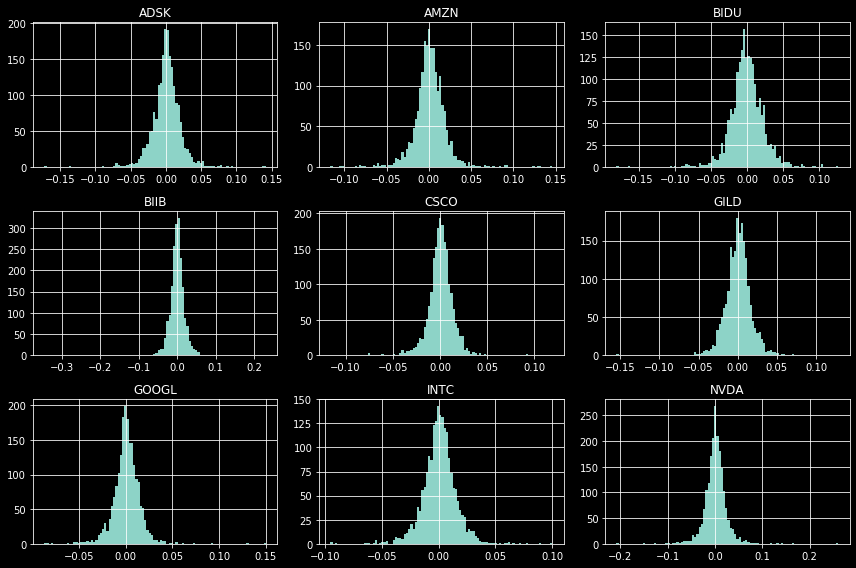

In [16]:
plt.style.use('dark_background')
returns.hist(bins=100,figsize=(12,8))
plt.tight_layout();

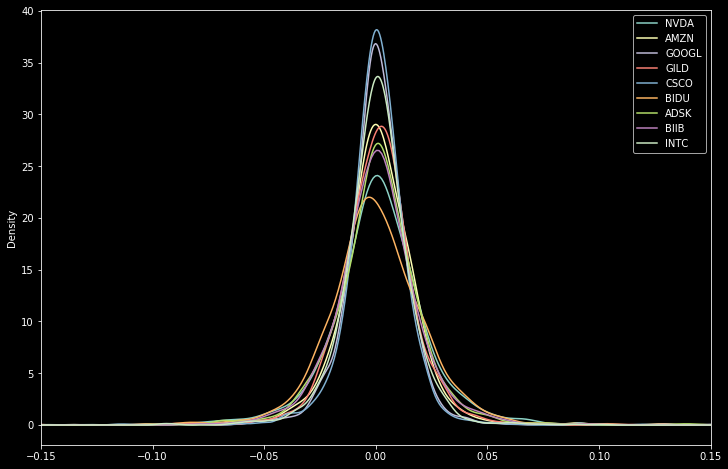

In [18]:
returns.plot(kind='kde',figsize=(12,8))
plt.xlim(xmax=0.15,xmin=-0.15);

In [62]:
weights = np.full((len(tickers)),1/len(tickers))
weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [63]:
returns.corr()

,NVDA,AMZN,GOOGL,GILD,CSCO,BIDU,ADSK,BIIB,INTC
NVDA,1.000000,0.364425,0.402566,0.222195,0.401844,0.321255,0.408550,0.187445,0.468292
AMZN,0.364425,1.000000,0.560276,0.268484,0.367875,0.343853,0.389428,0.226553,0.332361
GOOGL,0.402566,0.560276,1.000000,0.300247,0.389439,0.396721,0.425403,0.278682,0.378994
GILD,0.222195,0.268484,0.300247,1.000000,0.267770,0.237996,0.290944,0.446227,0.266774
CSCO,0.401844,0.367875,0.389439,0.267770,1.000000,0.284869,0.422325,0.232850,0.478762
BIDU,0.321255,0.343853,0.396721,0.237996,0.284869,1.000000,0.372664,0.211286,0.302755
ADSK,0.408550,0.389428,0.425403,0.290944,0.422325,0.372664,1.000000,0.249541,0.395104
BIIB,0.187445,0.226553,0.278682,0.446227,0.232850,0.211286,0.249541,1.000000,0.225689
INTC,0.468292,0.332361,0.378994,0.266774,0.478762,0.302755,0.395104,0.225689,1.000000


In [107]:
num_ports = 50000
all_weights = np.zeros((num_ports,len(tickers)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(len(tickers)))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    #Expected return array
    ret_arr[ind] = np.sum((returns.mean()*weights)*252)
    
    #Volatily array
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    
    #Sharpe ration array
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [108]:
sharpe_arr.max()

1.1563490119430808

In [109]:
max_sharpe_index = sharpe_arr.argmax()

In [110]:
all_weights[max_sharpe_index,:]

array([0.25936571, 0.26225678, 0.08674289, 0.14208037, 0.09400195,
       0.01005368, 0.06782476, 0.03057685, 0.04709702])

In [111]:
max_sr_ret = ret_arr[max_sharpe_index]
max_sr_vol = vol_arr[max_sharpe_index]
print('Max return: %s'%max_sr_ret, 'Optimal vol: %s'%max_sr_vol)

Max return: 0.24266602059193407 Optimal vol: 0.20985534478398368


In [112]:
title = 'Optimal Portfolio allocation: '
for index,ticker in enumerate(tickers):
    title += ' '+ticker+': '+str(all_weights[max_sharpe_index,index])
print(title)

Optimal Portfolio allocation:  NVDA: 0.25936571104578465 AMZN: 0.2622567753876204 GOOGL: 0.08674289199915829 GILD: 0.14208036824364864 CSCO: 0.0940019509119717 BIDU: 0.010053684529714686 ADSK: 0.06782475558164892 BIIB: 0.03057684598818397 INTC: 0.0470970163122687


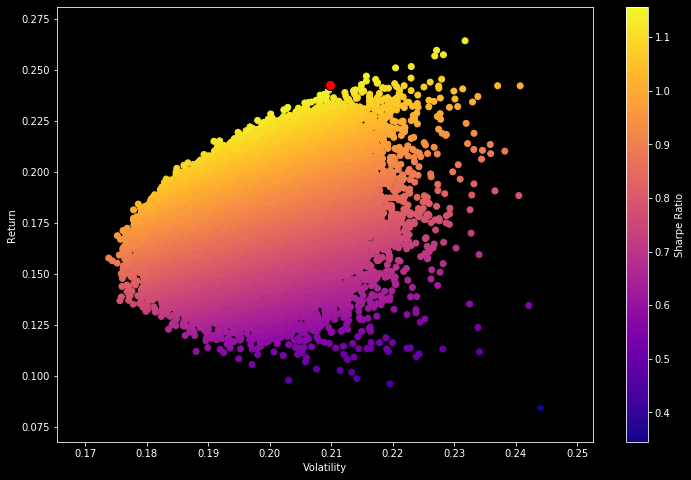

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black');